# 1 - Beginner - Plot Spectra and Albedos from SMARTS

#### Generate & Plot Spectra and Albedos from SMARTS
***
###### &ensp;&ensp;&ensp;&ensp; * 1. DNI and DHI for a particular time and location
###### &ensp;&ensp;&ensp;&ensp; * 2. Ground Albedo for various materials at AM 1.5
###### &ensp;&ensp;&ensp;&ensp; * 3. Ground Albedo for complete AOD and PWD Weather Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pvlib
import datetime
import pprint
import os
import pySMARTS

In [2]:
plt.rcParams['timezone'] = 'Etc/GMT+7'
font = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 18}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (12, 5)


In [3]:
# This information helps with debugging and getting support :)
import sys, platform
print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pySMARTS version ", pySMARTS.__version__)

Working on a  Windows 10
Python version  3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Pandas version  2.2.2
pySMARTS version  0.0.1a1.dev14+g1573ee8.d20241128


In [4]:
SMARTSPATH = r'C:\Users\sayala\Documents\GitHub\py-SMARTS\SMARTS'

# 1. Plot a DNI and DHI for a particular time and location


In [5]:
IOUT = '2 3' # DNI and DHI

In [20]:
YEAR = '2021'
MONTH = '06'
DAY = '21'
HOUR = '12'
LATIT = '33'
LONGIT = '-110'
ALTIT = '0.9' # km above sea level
ZONE = '-7' # Timezone

In [19]:
pySMARTS.SMARTSTimeLocation(IOUT,YEAR,MONTH,DAY,HOUR, LATIT, LONGIT, ALTIT, ZONE, SMARTSPATH=SMARTSPATH)


Wvlgth  Zonal_ground_reflectance
0      280.0                   0.02955
1      280.5                   0.02952
2      281.0                   0.02953
3      281.5                   0.02951
4      282.0                   0.02952
...      ...                       ...
1997  3980.0                   0.13700
1998  3985.0                   0.13740
1999  3990.0                   0.13810
2000  3995.0                   0.13890
2001  4000.0                   0.13980

[2002 rows x 2 columns]

# 2. Plot Albedos from SMARTS

In [8]:
IOUT = '30' # Albedo

#### Plot Ground Albedo AM 1.0

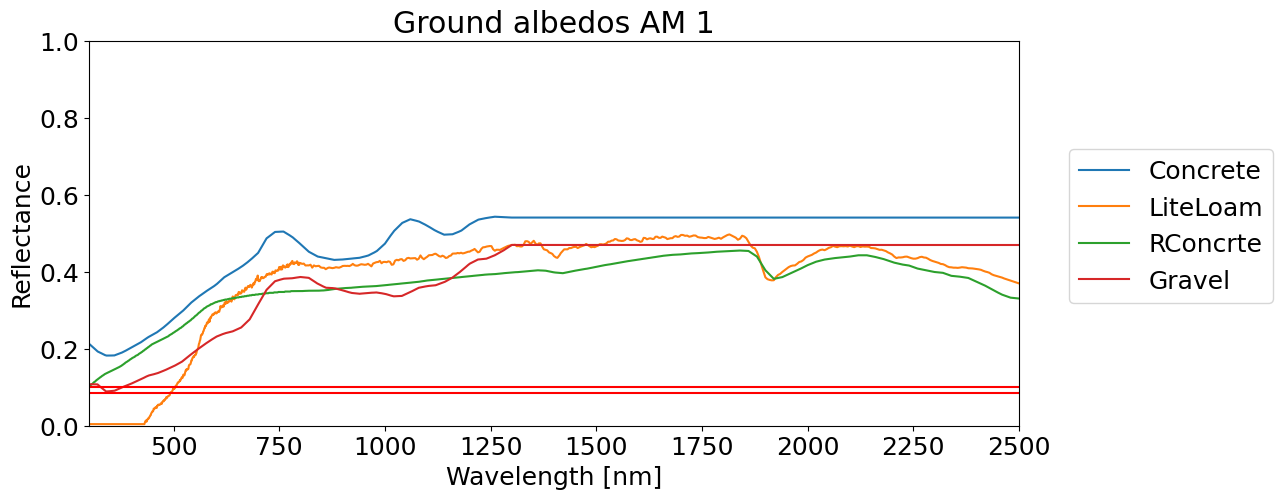

Concrete    0.446679
LiteLoam    0.335459
RConcrte    0.329492
Gravel      0.348642
dtype: float64
Concrete    0.191439
LiteLoam    0.004157
RConcrte    0.132566
Gravel      0.098542
dtype: float64


In [9]:
materials = ['Concrete', 'LiteLoam', 'RConcrte', 'Gravel']

alb_db = pd.DataFrame()

for i in range (0, len(materials)):

    alb = pySMARTS.SMARTSAirMass(IOUT=IOUT, AMASS='1.5', material=materials[i])

    alb_db[materials[i]] = alb[alb.keys()[1]]
    
alb_db.index = alb.Wvlgth

alb_db_10 = alb_db

for col in alb_db:
    alb_db[col].plot(legend=True)
    
plt.xlabel('Wavelength [nm]')
plt.xlim([300, 2500])
plt.axhline(y=0.084, color='r')
plt.axhline(y=0.10, color='r')

#UV albedo: 295 to 385
#Total albedo: 300 to 3000
#10.4 and 8.4 $ Measured
#References

plt.ylim([0,1])
plt.ylabel('Reflectance')
plt.legend(bbox_to_anchor=(1.04,0.75), loc="upper left")
plt.title('Ground albedos AM 1')
plt.show()

vis=alb_db.iloc[40:1801].mean()
uv=alb_db.iloc[30:210].mean()

print(vis)
print(uv)

## Extra: Averaging Albedos for Visible and UV


In [10]:
vis=alb_db.iloc[40:1801].mean()
uv=alb_db.iloc[30:210].mean()
print("Albedo on Visible Range:\n", vis)
print("Albedo on UV Range:\n", uv)

Albedo on Visible Range:
 Concrete    0.446679
LiteLoam    0.335459
RConcrte    0.329492
Gravel      0.348642
dtype: float64
Albedo on UV Range:
 Concrete    0.191439
LiteLoam    0.004157
RConcrte    0.132566
Gravel      0.098542
dtype: float64


<div class="alert alert-block alert-info"><b>Tip: </b> If you want full spectrum averages, we recommend interpolating as the default granularity of SMARTS at higher wavelengths is not the same than at lower wavelengths, thus the 'step' is not the same. </div>


In [11]:
r = pd.RangeIndex(2800,40000, 5)
r = r/10
alb2 = alb_db.reindex(r, method='ffill')
print("Albedo for all wavelengths:", alb2.mean())

Albedo for all wavelengths: Concrete    0.504434
LiteLoam    0.294001
RConcrte    0.267986
Gravel      0.420818
dtype: float64


In [12]:
# FYI: Wavelengths corresponding to the albedo before and after interpolating
"""
# Visible
alb_db.iloc[40] # 300
alb_db.iloc[1801] # 3000

# UV
alb_db.iloc[30] # 295
alb_db.iloc[210] # 385        

# Visible
alb2.iloc[40] # 300
alb2.iloc[5440] # 3000

# UV
alb2.iloc[30] # 295
alb2.iloc[210] # 385   
"""

'\n# Visible\nalb_db.iloc[40] # 300\nalb_db.iloc[1801] # 3000\n\n# UV\nalb_db.iloc[30] # 295\nalb_db.iloc[210] # 385        \n\n# Visible\nalb2.iloc[40] # 300\nalb2.iloc[5440] # 3000\n\n# UV\nalb2.iloc[30] # 295\nalb2.iloc[210] # 385   \n'

# 3. ADVANCED: Plot Ground Albedo for More Complete Weather Data

#### This asumes you know a lot more parameters about your weather data souch as: Broadband Turbidity, Aeorsol Opticla Density parameters, and Precipitable Water. 


###  Real Input data from SRRL for OCTOBER 21st, 12:45 PM

In [13]:
alb = 0.2205
YEAR='2020'; MONTH='10'; DAY='21'; HOUR = '12.75' 
LATIT='39.74'; LONGIT='-105.17'; ALTIT='1.0'; ZONE='-7'
TILT='33.0';  WAZIM='180.0'; HEIGHT='0' 
material='DryGrass'
min_wvl='280'; Max_wvl='4000'

TAIR = '20.3'
RH = '2.138'
SEASON = 'WINTER'
TDAY = '12.78'
SPR = '810.406'
RHOG = '0.2205'

WAZIMtracker = '270'
TILTtracker = '23.37'
tracker_tetha_bifrad = '-23.37'

TAU5='0.18422'     # SRRL-GRAL "Broadband Turbidity"
TAU5 = '0.037'    # SRRL-AOD [500nm]
GG = '0.7417'     # SSRL-AOD Asymmetry [500nm]
BETA = '0.0309'   # SRRL-AOD Beta
ALPHA = '0.1949'  # SRRL-AOD Alpha [Angstrom exp]
OMEGL = '0.9802'  # SRRL-AOD SSA [500nm]
W = str(7.9/10)   # SRRL-PWD  Precipitable Water [mm]

In [14]:
material = 'DryGrass'

alb_db = pd.DataFrame()

alb = pySMARTS.SMARTSSRRL(
    IOUT=IOUT, YEAR=YEAR, MONTH=MONTH,DAY=DAY, HOUR='12.45', LATIT=LATIT, 
    LONGIT=LONGIT, ALTIT=ALTIT, 
    ZONE=ZONE, W=W, RH=RH, TAIR=TAIR, 
    SEASON=SEASON, TDAY=TDAY, TAU5=None, SPR=SPR, 
    TILT=TILT, WAZIM=WAZIM,
    ALPHA1 = ALPHA, ALPHA2 = 0, OMEGL = OMEGL,
    GG = GG, BETA = BETA,
    RHOG=RHOG, HEIGHT=HEIGHT, material=material, POA = True)

alb_db[material] = alb[alb.keys()[1]]   
alb_db.index = alb.Wvlgth


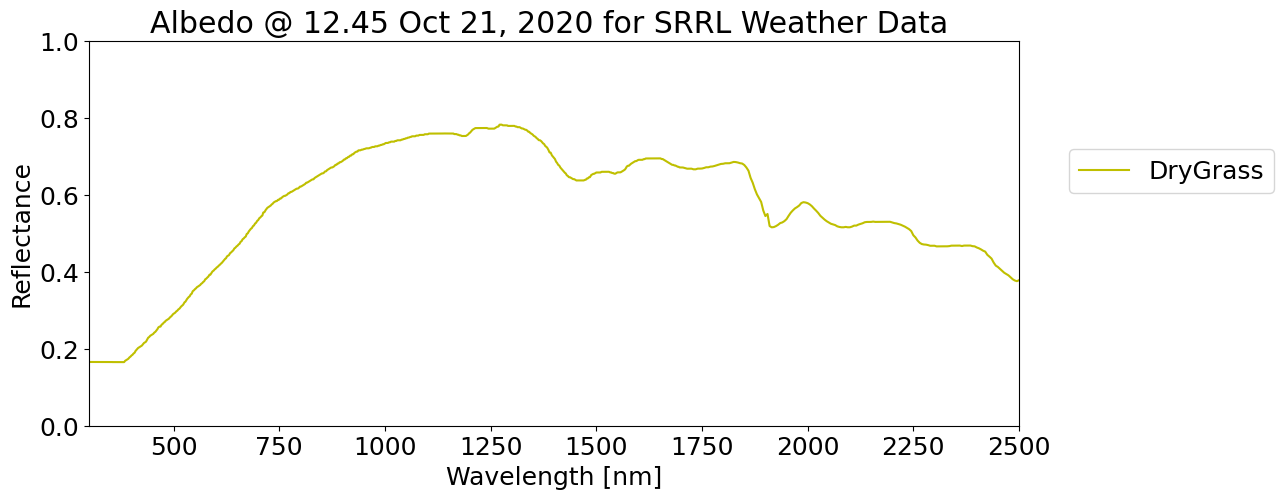

In [15]:
alb_db[material].plot(legend=True, color='y')
plt.xlabel('Wavelength [nm]')
plt.xlim([300, 2500])
plt.ylim([0,1])
plt.ylabel('Reflectance')
plt.legend(bbox_to_anchor=(1.04,0.75), loc="upper left")
plt.title('Albedo @ 12.45 Oct 21, 2020 for SRRL Weather Data ')
plt.show()


### A plotly plot to explore the results

In [16]:
import plotly.express as px

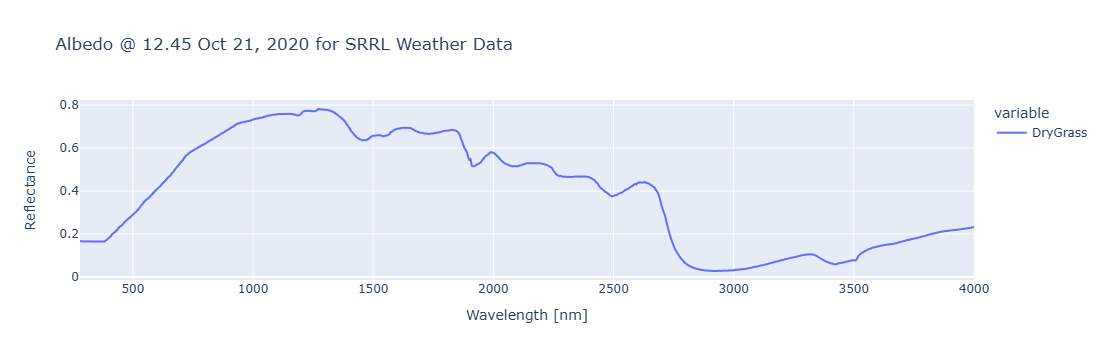

In [17]:
fig = px.line(alb_db[material], title='Albedo @ 12.45 Oct 21, 2020 for SRRL Weather Data')

fig.update_layout(xaxis_title='Wavelength [nm]',
                  yaxis_title='Reflectance')
fig.show()
